In [309]:
import sys
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import collections
import random

%matplotlib inline

# print (sys.path)
# with open('C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_business.json') as json_file:      
#     data = json_file.readlines()
#     # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
#     data = list(map(json.loads, data)) 

# user_df = pd.DataFrame(data)
business_data = pd.read_json("C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_business.json", lines=True)
checkin_data = pd.read_json("C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_checkin.json", lines=True)
# review_data = pd.read_json("C:/Users/sukan/Documents/TUM/Courses/Winter 2018/Data Mining Praktikum/Yelp/dataset/yelp_dataset/yelp_academic_dataset_review.json", lines=True)

In [310]:
joined_table = business_data.join(checkin_data.set_index('business_id'), on='business_id', how='right', lsuffix='_b', rsuffix='_c')
# joined_table[joined_table.business_id=='kREVIrSBbtqBhIYkTccQUg']
# business_review = business_data.join(review_data.set_index('business_id'), on='business_id', how='right', lsuffix='_b', rsuffix='_c')
joined_table['ccount'] = joined_table['time'].map(lambda x: len(x))
joined_table[joined_table.business_id=='kREVIrSBbtqBhIYkTccQUg']
# business_review[business_review.business_id=='kREVIrSBbtqBhIYkTccQUg']

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,time,ccount
83095,6901 Belt Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",kREVIrSBbtqBhIYkTccQUg,"Amusement Parks, Active Life",Concord,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",0,35.383162,-80.694882,Richard Petty Driving Experience,,28027,5,4.0,NC,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",7


In [311]:
cities_categories = {}
categories_cities = {}
cuisines = {}
for index, business in business_data.iterrows():
#     for category in business.categories:
#         if index<2:
#             print(category + "-")
    if business.categories is not None:
        categories = {s.strip() for s in business.categories.split(',') if s.strip()}
#         if business.city == 'Calgary':
#             print(categories)
#         if business.city == 'Calgary' and 'Restaurants' in categories:
#             print ("restaurant in calgary")
        for category in categories:
            if category in categories_cities.keys():
                if business.city in categories_cities[category]:
                    categories_cities[category][business.city] = categories_cities[category][business.city] + 1
                else:
                    categories_cities[category][business.city] = 1
            else:
                categories_cities[category] = {business.city: 1}
        if business.city in cities_categories:
            for category in categories:
                if category in cities_categories[business.city].keys():
#                     print (category)
                    cities_categories[business.city][category] = cities_categories[business.city][category] + 1;
                else:
                    cities_categories[business.city].update({category: 1})
        else:
            cnt = 0
            for category in categories:
                cnt = cnt + 1
                if cnt==1:
                    cities_categories[business.city] = {category: 1}
                    break;
                cities_categories[business.city].update({category: 1})
#     if index==50:
#         print(categories_cities)
# print (cities_categories['Calgary'])


In [312]:

(sorted(cities_categories['Calgary'].items(), key=operator.itemgetter(1), reverse=True)[:10])


[('Restaurants', 2794),
 ('Food', 1359),
 ('Shopping', 1300),
 ('Beauty & Spas', 750),
 ('Nightlife', 615),
 ('Bars', 552),
 ('Automotive', 473),
 ('Health & Medical', 401),
 ('Coffee & Tea', 386),
 ('Home Services', 358)]

In [313]:
# cuisines = {}
# for index, business in business_data.iterrows():
#     if business.categories is not None:
#         categories = {s.strip() for s in business.categories.split(',') if s.strip()}
#         if 'Restaurants' in categories:
#             if cuisines == {}:
#                 cuisines = categories
#             else:
#                 cuisines.update(categories)
#             cuisines.remove('Restaurants')
# #  cuisines.difference({'Food', 'Local Services', 'Real Estate', 'Discount Store', 
# #                      'Local Services', 'Landmarks & Historical Buildings', 
# #                      'Pumpkin Patches', 'Damage Restoration', 'Taxis', 
# #                      'Dentists', 'Heating & Air Conditioning/HVAC', 
# #                      'Performing Arts', 'Windshield Installation & Repair', 'Paint-Your-Own Pottery', 
# #                      'Climbing', 'Gyms', 'Sports Wear', 'Day Camps', 'Mass Media', 'Arts & Entertainment', 
# #                      'Pet Boarding', 'Nutritionists', 'Toy Stores', 'Personal Injury Law', 'Organic Stores', 
# #                      'Cards & Stationery', 'Motorcycle Repair', 'Used', 'Travel Services', 'Outlet Stores', 
# #                      'Audio/Visual Equipment Rental', 'Septic Services', 'Video Game Stores', 'Meditation Centers', 
# #                      'Check Cashing/Pay-day Loans', 'Venues & Event Spaces', 'Weight Loss Centers', 'Batting Cages', 
# #                      'Music Venues', 'Shopping Centers', 'Security Services', 'Event Photography', 'Nail Technicians', 
# #                      'Tobacco Shops', 'Tanning', 'Pet Adoption', 'Leisure Centers', 'Cosmetic Surgeons', 'Airport Terminals', 
# #                      'Nightlife', 'Community Centers', 'Wine Tasting Classes', 'Event Planning & Services', 'Animal Shelters', 
# #                      'Butcher', 
# #                     })
cuisines = {'Bagels', 'Mediterranean', 'Gelato', 'Tiki Bars', 'Bavarian', 'Do-It-Yourself Food', 'Ukrainian', 'Beer', 'Karaoke', 'Pizza', 'Whiskey Bars', 'Kosher', 'Resorts', 'Creperies', 'Kombucha', 'Seafood', 'Gyms', 'Honduran', 'Beer Garden', 'Acai Bowls', 'Austrian', 'Salad', 'Armenian', 'Persian/Iranian', 'Salvadoran', 'African', 'Wine & Spirits', 'Ethiopian', 'Taiwanese', 'Sushi Bars', 'Ice Cream & Frozen Yogurt', 'Brazilian', 'Patisserie/Cake Shop', 'Teppanyaki', 'Toy Stores', 'Dive Bars', 'Pretzels', 'Tai Chi', 'Signature Cuisine', 'Izakaya', 'Udon', 'Sri Lankan', 'Waffles', 'Tacos', 'Internet Cafes', 'Beer Gardens', 'Lebanese', 'Chicken Wings', 'Cupcakes', 'Cantonese', 'Palatine', 'Social Clubs', 'Argentine', 'Tea Rooms', 'Themed Cafes', 'Burmese', 'Belgian', 'Nightlife', 'Wine Tasting Classes', 'Burgers', 'Bars', 'Singaporean', 'Puerto Rican', 'Country Clubs', 'Vegan', 'Diners', 'Local Flavor', 'Shaved Ice', 'Pita', 'Soul Food', 'Steakhouses', 'Bangladeshi', 'Filipino', 'Senegalese', 'Japanese', 'Sugar Shacks', 'Delis', 'Wraps', 'South African', 'Fondue', 'Hakka', 'Kebab', 'Hot Dogs', 'Pakistani', 'Nicaraguan', 'Breakfast & Brunch', 'Hong Kong Style Cafe', 'Fast Food', 'Hungarian', 'Custom Cakes', 'Cafeteria', 'Italian', 'Russian', 'Spanish', 'Greek', 'Pasta Shops', 'Shanghainese', 'Vietnamese', 'Iberian', 'Brewpubs', 'Korean', 'Desserts', 'Haitian', 'Coffee & Tea', 'Tapas/Small Plates', 'Hookah Bars', 'Strip Clubs', 'Buffets', 'Popcorn Shops', 'Tex-Mex', 'Dim Sum', 'Juice Bars & Smoothies', 'Middle Eastern', 'Syrian', 'Delicatessen', 'German', 'Soup', 'Champagne Bars', 'Hawaiian', 'Dominican', 'Laotian', 'Beer Hall', 'Szechuan', 'Chocolatiers & Shops', 'American (New)', 'Cocktail Bars', 'Venezuelan', 'Falafel', 'Sicilian', 'Sandwiches', 'Moroccan', 'Polish', 'Ramen', 'Malaysian', 'Scottish', 'Baguettes', 'Comfort Food', 'Cambodian', 'Guamanian', 'Northern German', 'Coffee & Tea Supplies', 'Tempura', 'Chinese', 'Race Tracks', 'Vegetarian', 'Noodles', 'Cheese Shops', 'New Mexican Cuisine', 'Ethnic Food', 'Asian Fusion', 'Cuban', 'Paint & Sip', 'Pop-Up Restaurants', 'Cheesesteaks', 'Piano Bars', 'Bed & Breakfast', 'Veterinarians', 'Coffeeshops', 'Cigar Bars', 'Irish', 'Southern', 'Irish Pub', 'Peruvian', 'Churros', 'Cideries', 'Basque', 'Hotel bar', 'French', 'Indonesian', 'Mauritius', 'Traditional Norwegian', 'Bistros', 'Milkshake Bars', 'Australian', 'Mongolian', 'Halal', 'Turkish', 'Portuguese', 'Dinner Theater', 'Japanese Curry', 'Hainan', 'Smokehouse', 'Barbeque', 'Uzbek', 'Scandinavian', 'Wine Bars', 'Macarons', 'Brasseries', 'Tapas Bars', 'Eastern European', 'Caribbean', 'Hot Pot', 'Live/Raw Food', 'Indian', 'Mexican', 'Bakeries', 'Gastropubs', 'Coffee Roasteries', 'Gay Bars', 'Tuscan', 'Czech', 'Donuts', 'Latin American', 'American (Traditional)', 'Canadian (New)', 'Afghan', 'Caterers', 'Bulgarian', 'British', 'Specialty Food', 'Chilean', 'Egyptian', 'Island Pub', 'Cajun/Creole', 'Pub Food', 'Candy Stores', 'Trinidadian', 'Tonkatsu', 'Marinas', 'Colombian', 'Cafes', 'Slovakian', 'Breweries', 'Fish & Chips', 'Modern European', 'Himalayan/Nepalese', 'Swiss Food', 'Serbo Croatian', 'Pubs', 'Pan Asian', 'Wineries', 'Beer Bar', 'Arabian', 'Bubble Tea', 'Thai', 'Czech/Slovakian'}
print (cuisines)

{'Bagels', 'Sicilian', 'Brasseries', 'Sandwiches', 'Nicaraguan', 'Mediterranean', 'Gelato', 'Tiki Bars', 'Moroccan', 'Tapas Bars', 'Breakfast & Brunch', 'Bavarian', 'Do-It-Yourself Food', 'Eastern European', 'Ukrainian', 'Beer', 'Karaoke', 'Caribbean', 'Hot Pot', 'Hong Kong Style Cafe', 'Pizza', 'Live/Raw Food', 'Indian', 'Fast Food', 'Polish', 'Ramen', 'Hungarian', 'Mexican', 'Malaysian', 'Scottish', 'Baguettes', 'Bakeries', 'Gastropubs', 'Whiskey Bars', 'Coffee Roasteries', 'Comfort Food', 'Gay Bars', 'Custom Cakes', 'Cafeteria', 'Cambodian', 'Guamanian', 'Tuscan', 'Italian', 'Kosher', 'Czech', 'Resorts', 'Russian', 'Creperies', 'Spanish', 'Kombucha', 'Donuts', 'Greek', 'Northern German', 'Latin American', 'Seafood', 'Gyms', 'Honduran', 'Beer Garden', 'Acai Bowls', 'Austrian', 'Coffee & Tea Supplies', 'Salad', 'American (Traditional)', 'Tempura', 'Armenian', 'Persian/Iranian', 'Salvadoran', 'Canadian (New)', 'Afghan', 'African', 'Race Tracks', 'Wine & Spirits', 'Pasta Shops', 'Ethiop

In [314]:
cities_cuisines = {}
for city in cities_categories:
    cities_cuisines[city] = { your_key: cities_categories[city][your_key] for your_key in cuisines if your_key in cities_categories[city] }

print(cities_cuisines['Calgary'])


{'Bagels': 12, 'Brasseries': 6, 'Sandwiches': 254, 'Mediterranean': 109, 'Tiki Bars': 1, 'Moroccan': 6, 'Tapas Bars': 44, 'Breakfast & Brunch': 211, 'Do-It-Yourself Food': 13, 'Ukrainian': 2, 'Beer': 124, 'Karaoke': 13, 'Caribbean': 12, 'Hot Pot': 7, 'Pizza': 332, 'Live/Raw Food': 3, 'Indian': 128, 'Fast Food': 264, 'Polish': 2, 'Ramen': 16, 'Hungarian': 3, 'Mexican': 87, 'Malaysian': 8, 'Scottish': 1, 'Bakeries': 170, 'Gastropubs': 29, 'Whiskey Bars': 4, 'Coffee Roasteries': 19, 'Comfort Food': 49, 'Gay Bars': 6, 'Custom Cakes': 4, 'Italian': 148, 'Resorts': 1, 'Creperies': 11, 'Spanish': 11, 'Donuts': 23, 'Greek': 49, 'Latin American': 17, 'Seafood': 85, 'Gyms': 76, 'Coffee & Tea Supplies': 5, 'Salad': 64, 'American (Traditional)': 190, 'Persian/Iranian': 9, 'Salvadoran': 1, 'Canadian (New)': 271, 'Afghan': 6, 'African': 9, 'Wine & Spirits': 124, 'Ethiopian': 6, 'Chinese': 211, 'Vegetarian': 35, 'Noodles': 26, 'Cheese Shops': 8, 'Taiwanese': 11, 'Sushi Bars': 127, 'Ice Cream & Frozen

In [315]:
cuisines_cities = {}
cuisines_cities = { your_key: categories_cities[your_key] for your_key in cuisines if your_key in categories_cities }

print(cuisines_cities['Chinese'])


{'Pittsburgh': 141, 'Scottsdale': 45, 'Madison': 74, 'Fitchburg': 2, 'Toronto': 603, 'Laval': 15, 'MontrÃ©al': 193, 'Westlake': 4, 'Cleveland': 95, 'Phoenix': 228, 'Calgary': 211, 'Medina': 5, 'Champaign': 37, 'Chandler': 72, 'Mesa': 89, 'Markham': 262, 'York': 8, 'Brampton': 41, 'Las Vegas': 453, 'Tempe': 51, 'Mississauga': 143, 'Scarborough': 131, 'Streetsboro': 4, 'Richmond Hill': 131, 'Boulder City': 4, 'Brossard': 18, 'Monona': 8, 'Vaughan': 30, 'Concord': 20, 'Brooklin': 1, 'Kirkland': 2, 'Belmont': 2, 'Gilbert': 25, 'Avondale': 10, 'Charlotte': 156, 'North York': 48, 'Aurora': 14, 'Matthews': 19, 'Fort Mill': 13, 'Painesville': 5, 'Maple': 4, 'Pineville': 4, 'Canonsburg': 7, 'Monroeville': 10, 'Henderson': 50, 'Oakville': 17, 'King': 1, 'Davidson': 2, 'Willowdale': 1, 'Irwin': 7, 'Chesterland': 2, 'Surprise': 13, 'Ambridge': 1, 'Glendale': 40, 'Cornelius': 7, 'Urbana': 8, 'Clairton': 1, 'Pleasant Hills': 2, 'Twinsburg': 4, 'West Mifflin': 4, 'Lakewood': 8, 'Etobicoke': 23, 'Parm

In [316]:
cities = list(set(business_data.city))
ten_cities = np.random.choice(cities, 50)
print(ten_cities)

['Otterburn Park' 'Shadyside' 'Nottingham' 'Library' 'Middleburg Hts'
 'Mississuaga' 'Brooklin' 'Scarobrough' 'Tornto' 'Waxhaw' 'McMurry'
 'Lake Las Vegas' 'Vinci' 'lachine' 'Highland Heights' 'Phoenix Valley'
 'Dane' 'Harrison City' 'Saint-Isidore-De-Laprairie' 'Fairlawn' 'Lachenaie'
 'Scarobrough' 'St Martin' 'Cuyahoga Fls' 'Fabreville' 'San Rafael'
 'St. Jean Sur Richelieu' 'York Regional Municipality' 'Tolono'
 'Pickering Ajax Whitby' 'Elrama' 'La Prairie' 'Bainbridge' 'Indian Land'
 'Sun City West' 'C Las Vegas' 'las Vegas' 'Bolton' 'Heidelberg'
 'Mont-Royal' 'St-Jean-sur-Richelieu' 'Orange Village' 'Elk Grove Villa'
 'Pointe Claire' 'Pointe Claire' 'Penn Hills' 'Pickering' 'Vanier' 'Lich'
 'Pine']


In [331]:
def plotCuisineCities(cuisine):
    xy = (sorted(cuisines_cities[cuisine].items(), key=operator.itemgetter(1), reverse=True)[:10])
    attr_ctr_df = pd.DataFrame(xy[:10], columns=['x','y'])
    n = attr_ctr_df.sort_values('y',ascending=False)
    # xy = xy.sort()
    # xs, ys = zip(*xy)
    # xs = np.arange(len(labels)) 
    # width = 1
    # print (n.y)
    plt.figure(figsize=(15, 8))
    plt.bar(np.arange(len(n)),n.y)
    plt.ylabel ('Number of Businesses')
    plt.xlabel ('City')
    plt.xticks([0,1,2,3,4,5,6,7,8,9], n.x, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    for i, v in enumerate(n.y):
        plt.text(i - 0.3, v + v/70, str(v), color='black', fontweight='bold')
    plt.title(cuisine + ' most available in these cities')
    plt.show()

In [332]:
def plotCityCuisines(city):
    xy = (sorted(cities_cuisines[city].items(), key=operator.itemgetter(1), reverse=True)[:10])
    attr_ctr_df = pd.DataFrame(xy[:10], columns=['x','y'])
    n = attr_ctr_df.sort_values('y',ascending=False)
    # xy = xy.sort()
    # xs, ys = zip(*xy)
    # xs = np.arange(len(labels)) 
    # width = 1
    # print (n.y)
    plt.figure(figsize=(15, 8))
    plt.bar(np.arange(len(n)),n.y)
    plt.ylabel ('Number of Businesses')
    plt.xlabel ('Cuisine')
    plt.xticks([0,1,2,3,4,5,6,7,8,9], n.x, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    for i, v in enumerate(n.y):
        plt.text(i - 0.3, v + v/70, str(v), color='black', fontweight='bold')
    plt.title('Most available cusines in ' + city)
    plt.show()

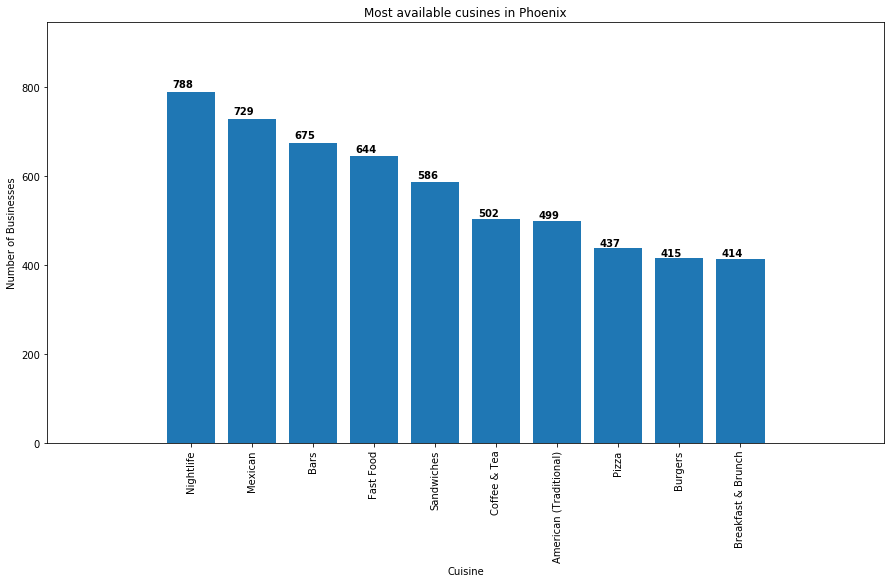

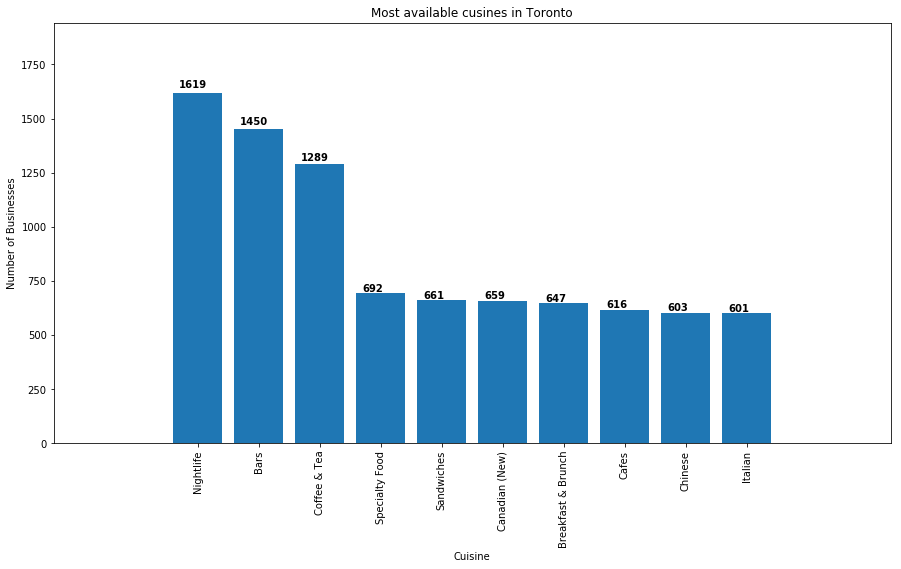

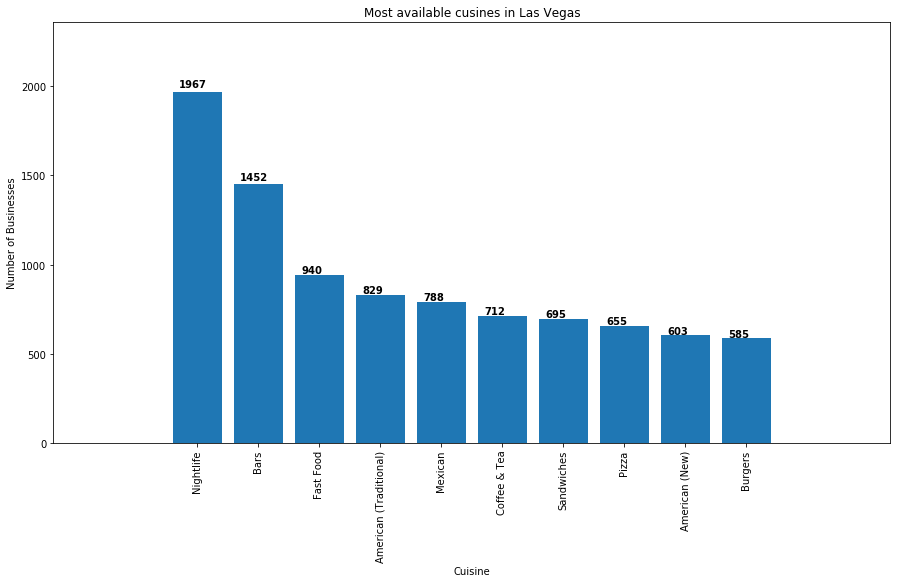

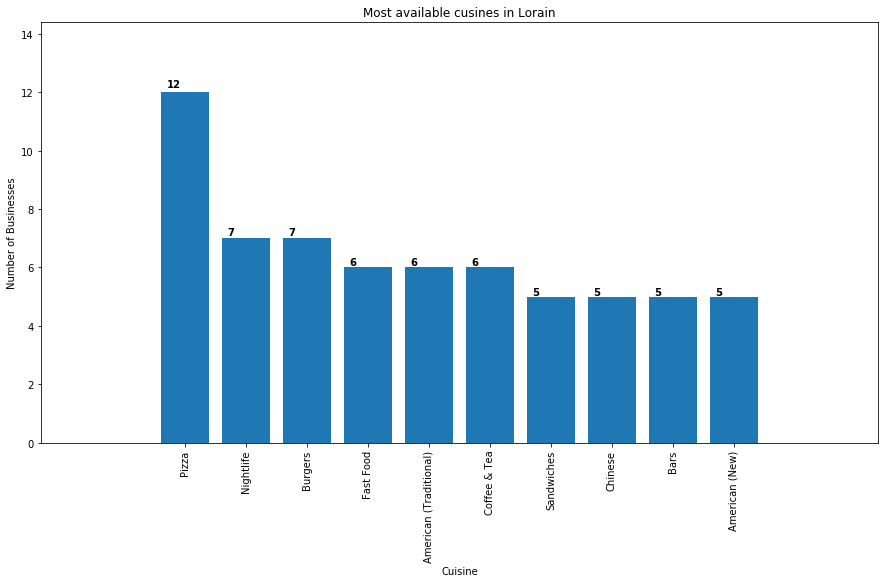

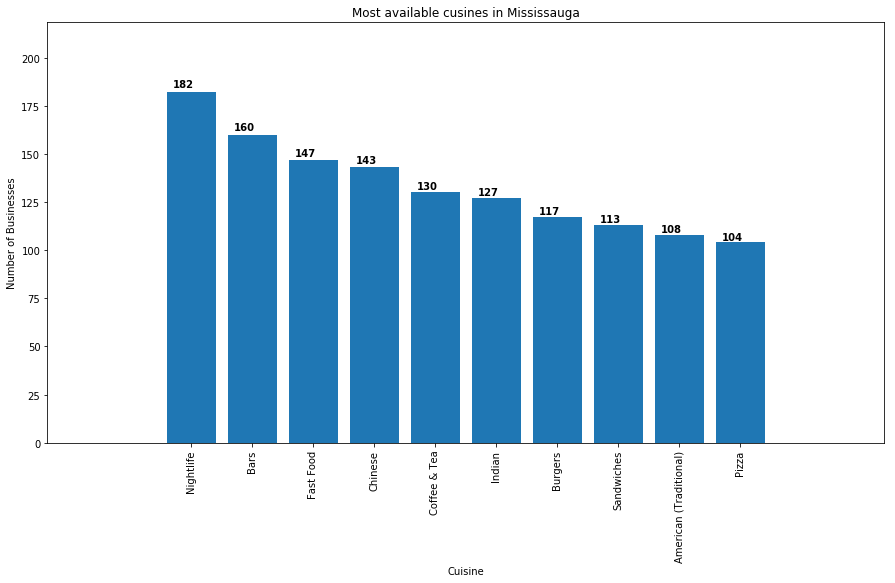

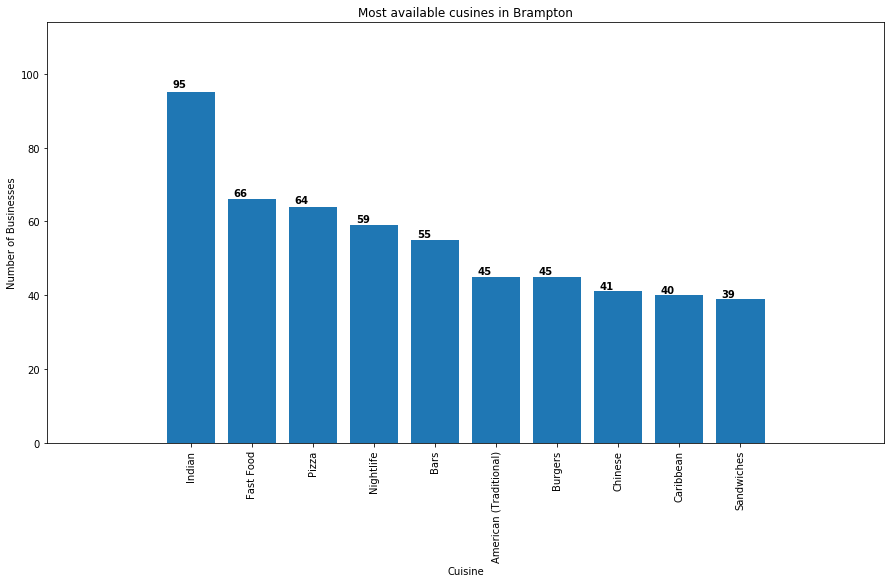

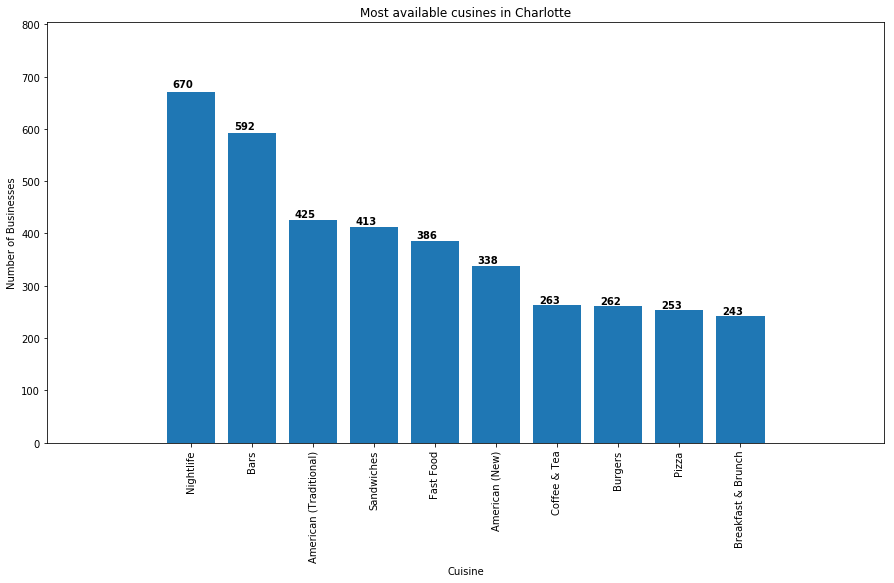

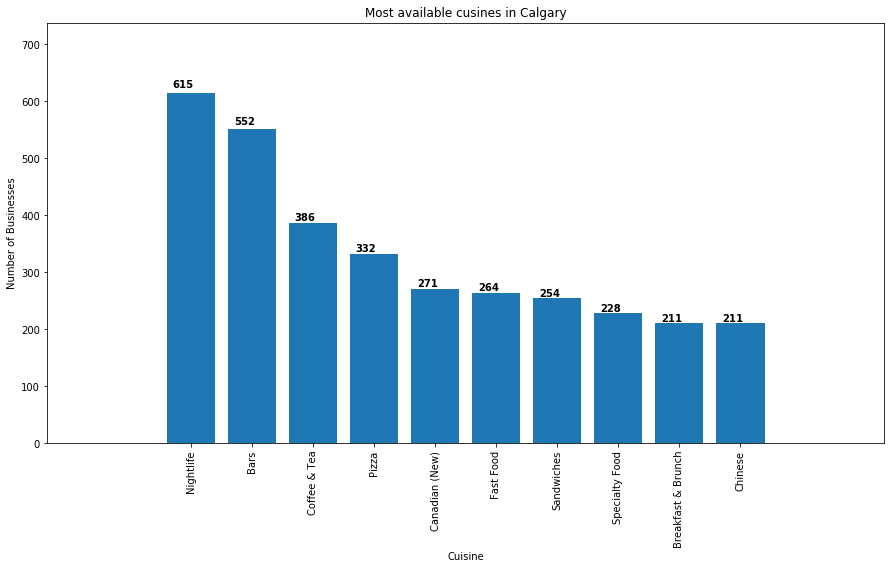

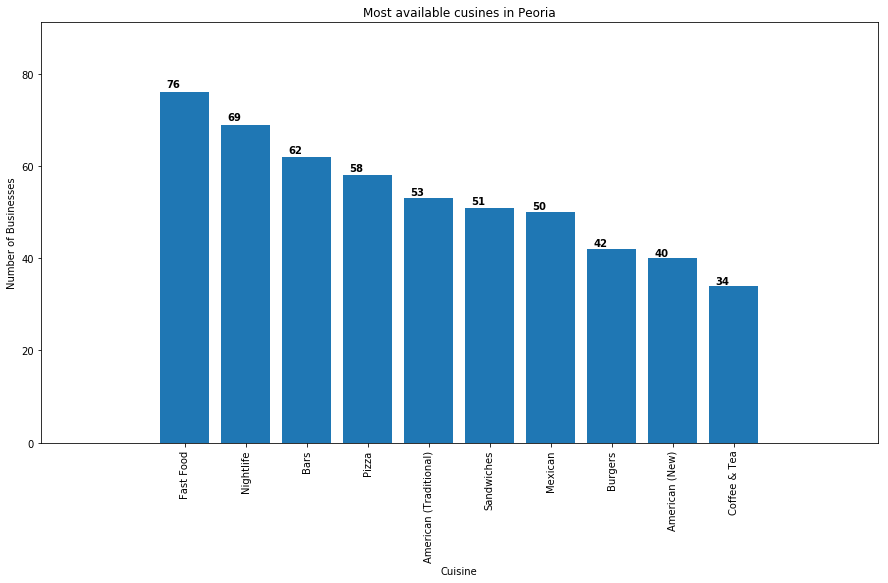

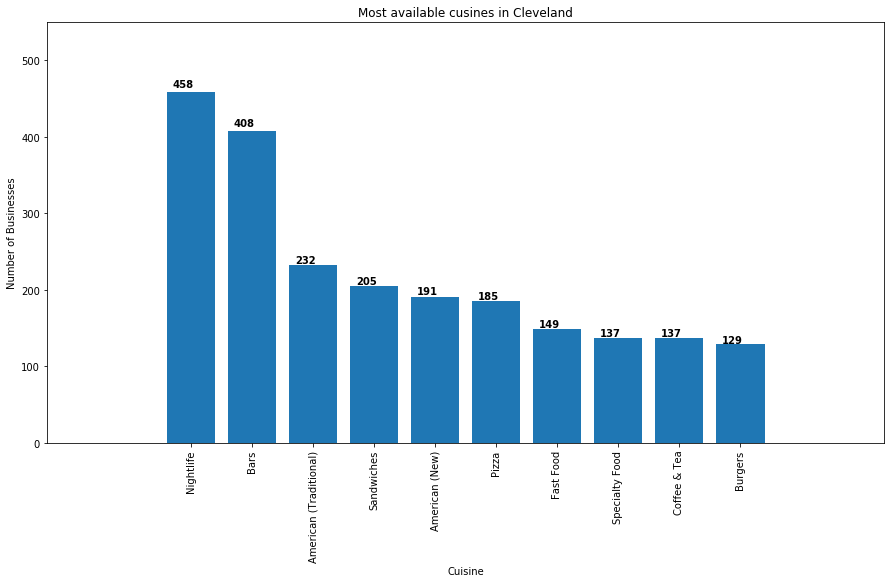

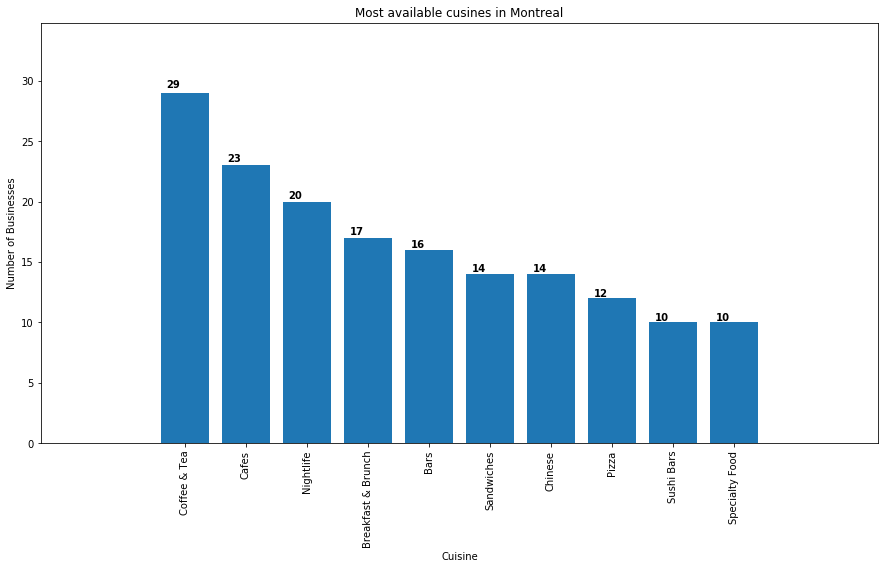

In [333]:
plotCityCuisines('Phoenix')
plotCityCuisines('Toronto')
plotCityCuisines('Las Vegas')
plotCityCuisines('Lorain')
plotCityCuisines('Mississauga')
plotCityCuisines('Brampton')
plotCityCuisines('Charlotte')
plotCityCuisines('Calgary')
plotCityCuisines('Peoria')
plotCityCuisines('Cleveland')
plotCityCuisines('Montreal')

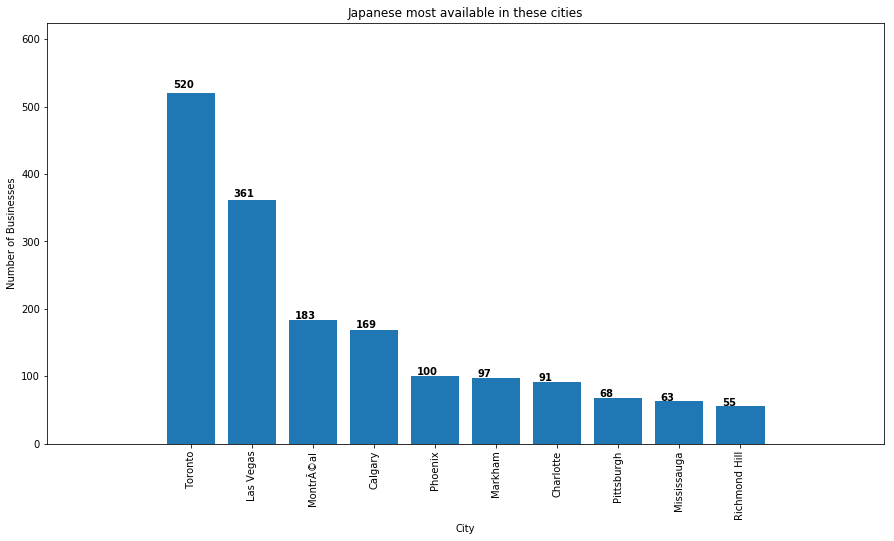

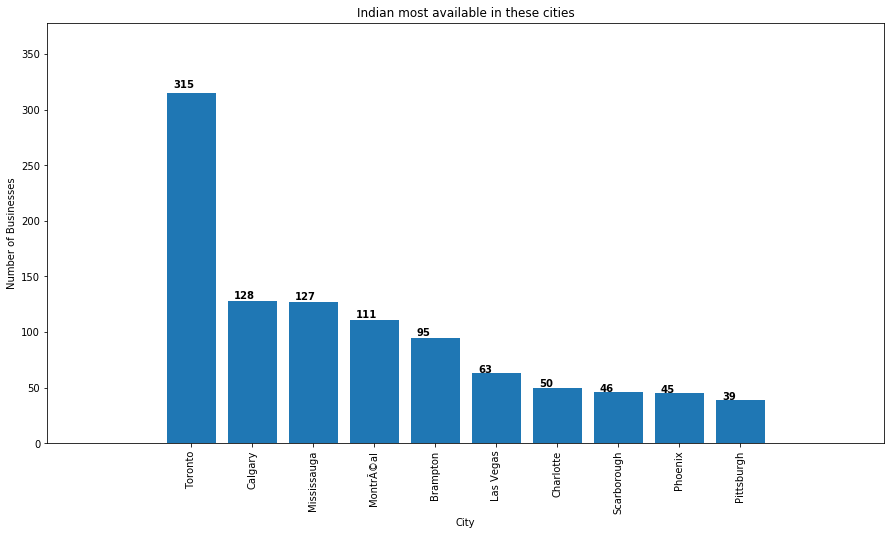

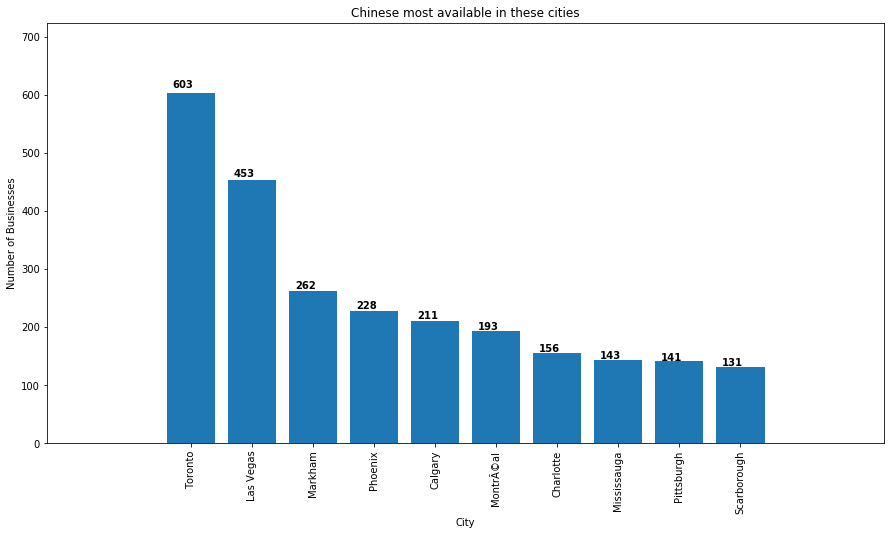

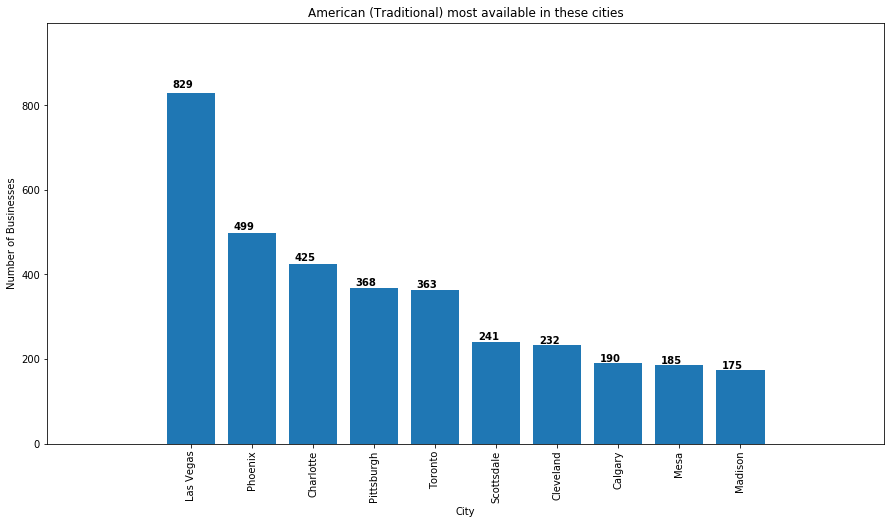

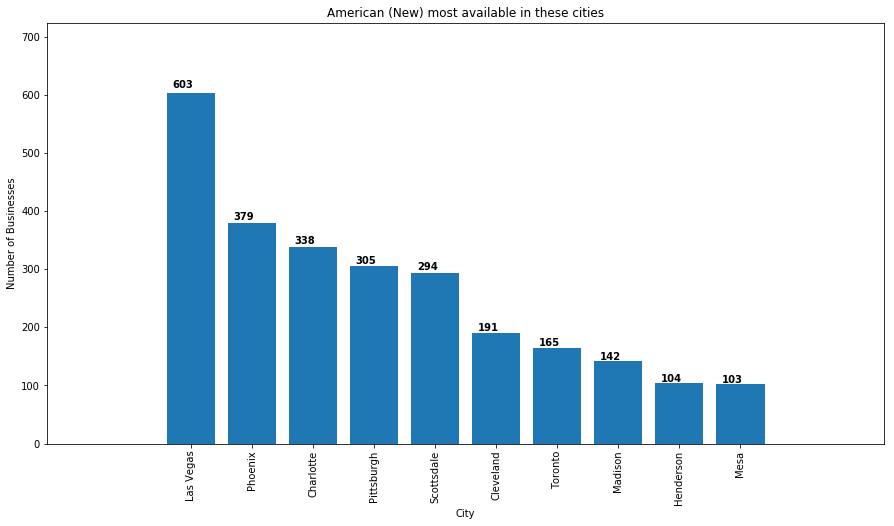

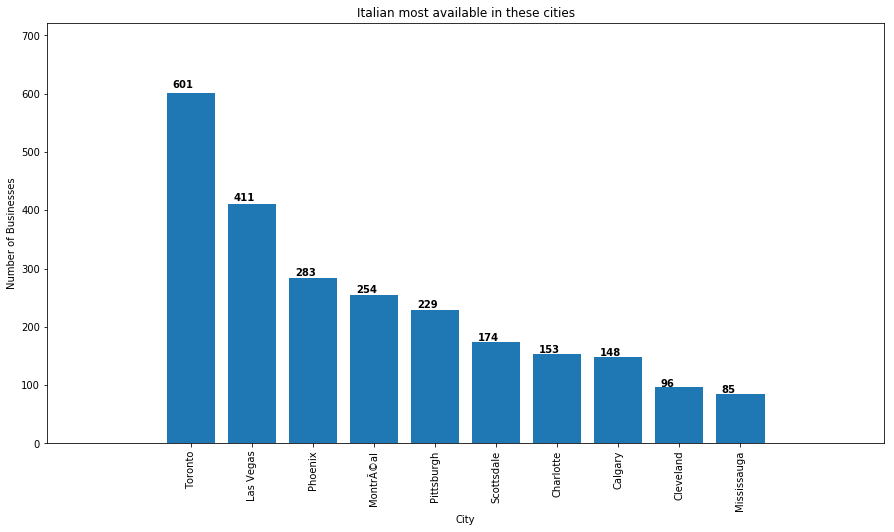

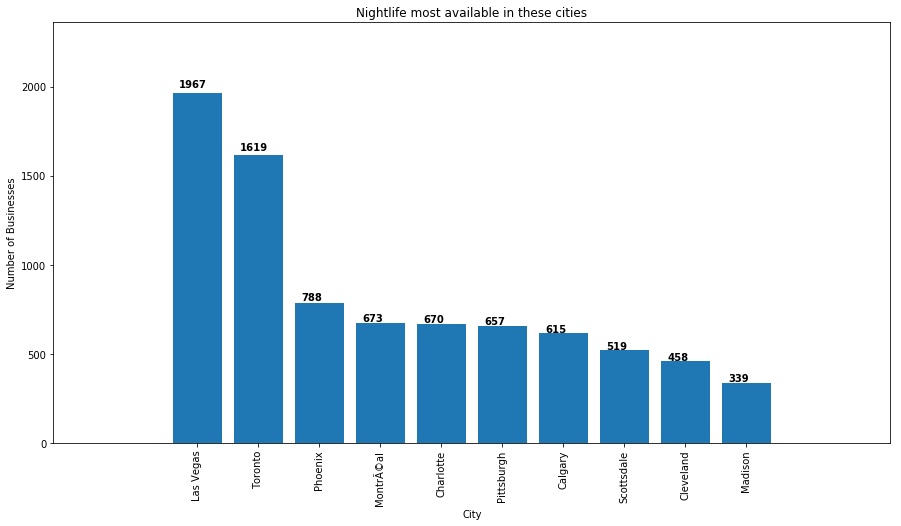

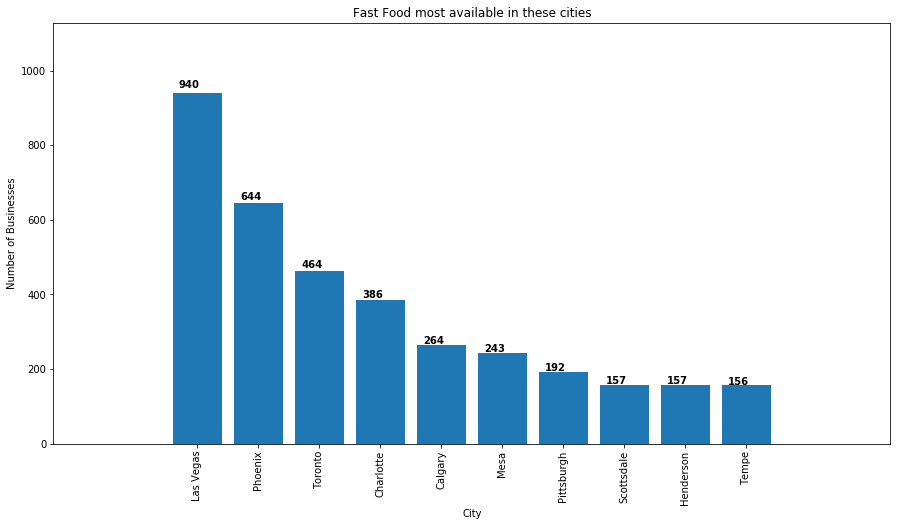

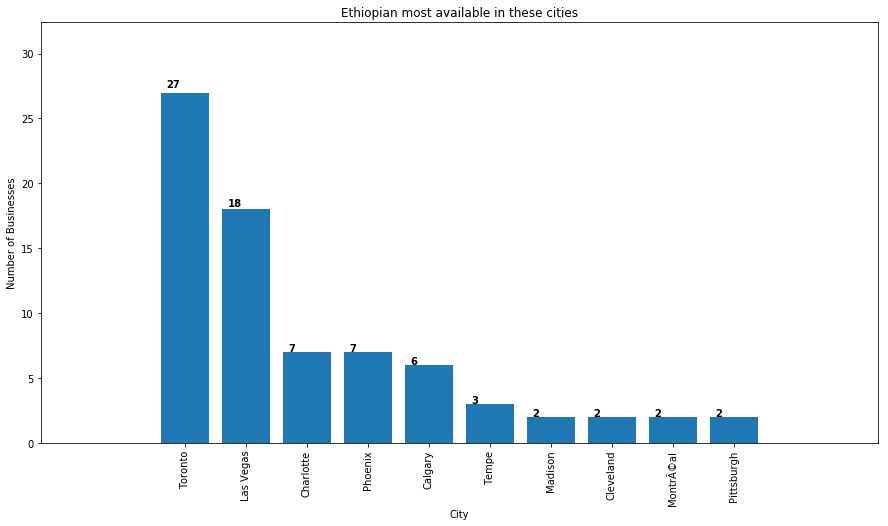

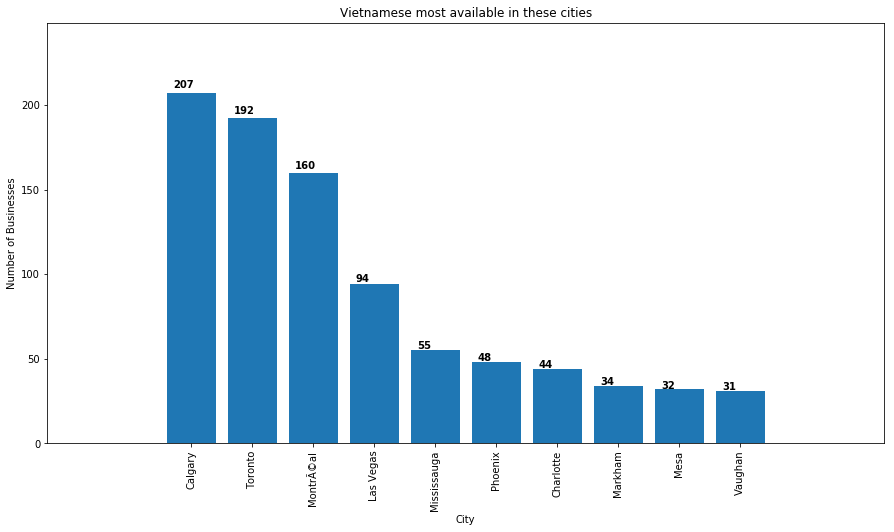

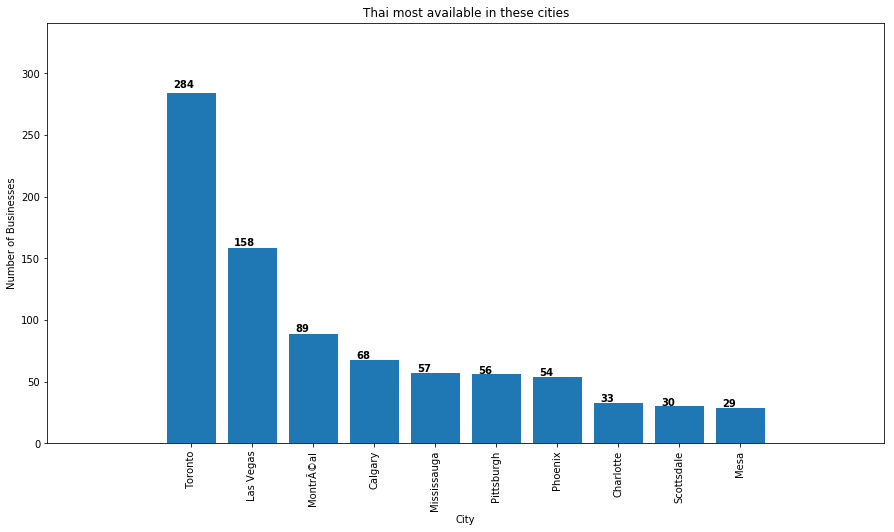

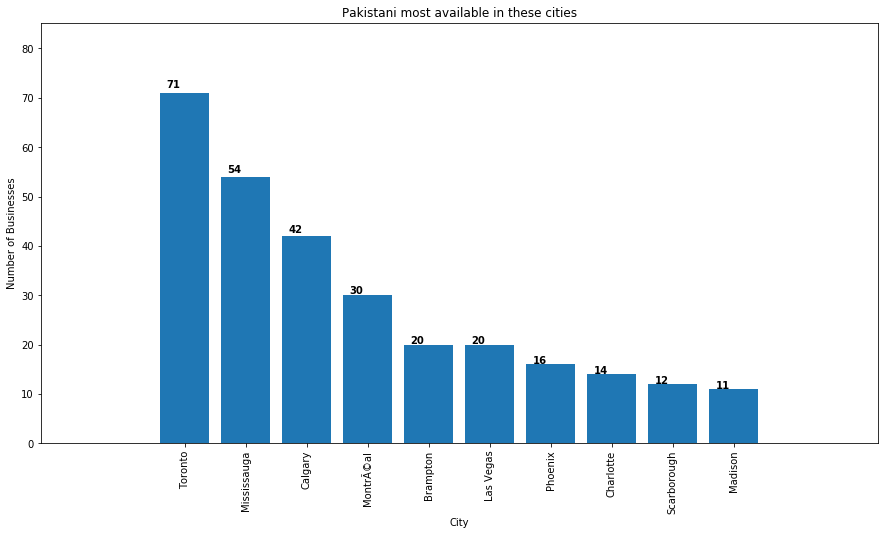

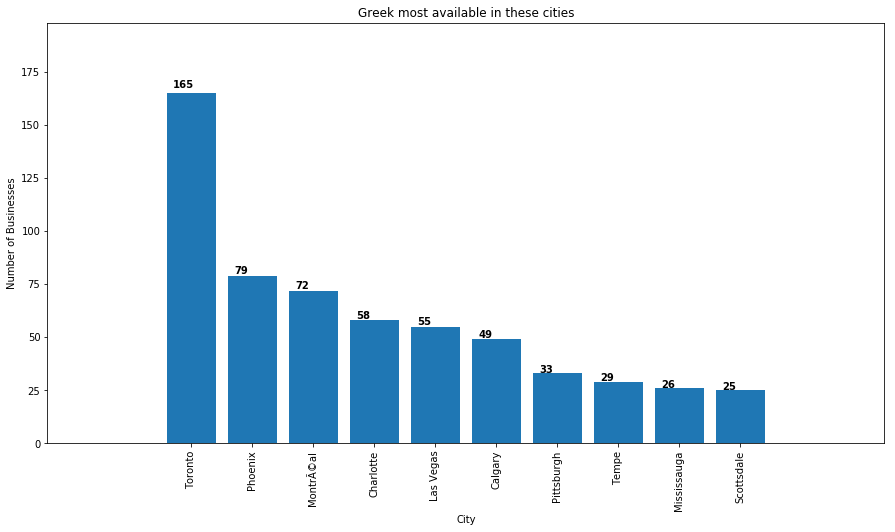

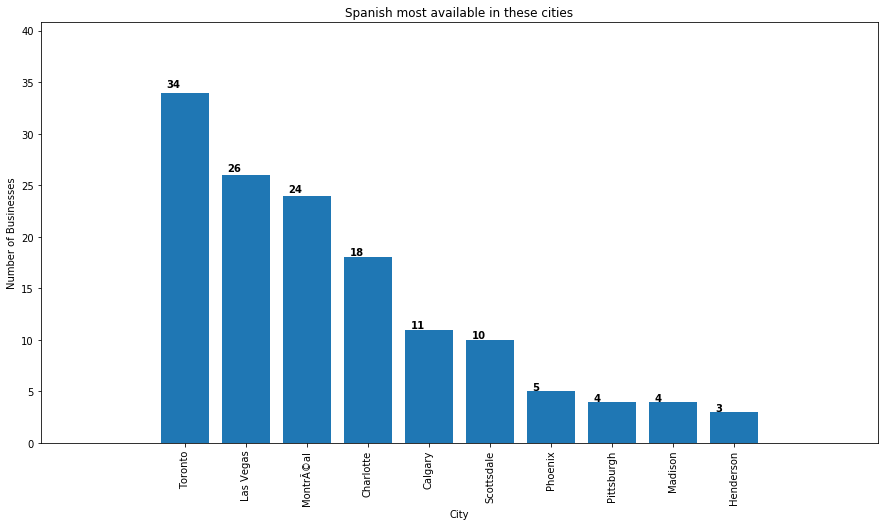

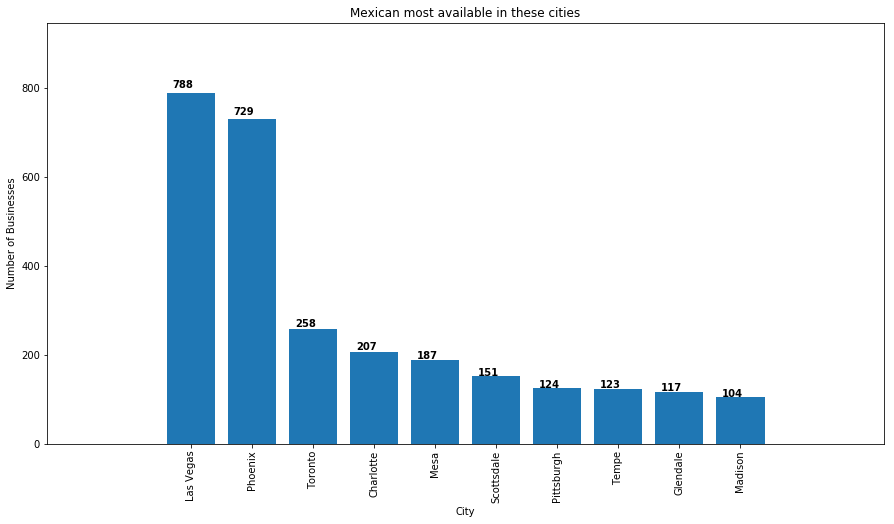

In [334]:
plotCuisineCities('Japanese')
plotCuisineCities('Indian')
plotCuisineCities('Chinese')
plotCuisineCities('American (Traditional)')
plotCuisineCities('American (New)')
plotCuisineCities('Italian')
plotCuisineCities('Nightlife')
plotCuisineCities('Fast Food')
plotCuisineCities('Ethiopian')
plotCuisineCities('Vietnamese')
plotCuisineCities('Thai')
plotCuisineCities('Pakistani')
plotCuisineCities('Greek')
plotCuisineCities('Spanish')
plotCuisineCities('Mexican')

In [321]:
cities_categories_checkins = {}
categories_cities_checkins = {}

for index, business in joined_table.iterrows():
#     for category in business.categories:
#         if index<2:
#             print(category + "-")
    if business.categories is not None:
        categories = {s.strip() for s in business.categories.split(',') if s.strip()}
#         if business.city == 'Calgary':
#             print(categories)
#         if business.city == 'Calgary' and 'Restaurants' in categories:
#             print ("restaurant in calgary")
        for category in categories:
            if category in categories_cities_checkins.keys():
                if business.city in categories_cities_checkins[category]:
                    categories_cities_checkins[category][business.city] = categories_cities_checkins[category][business.city] + business.ccount
                else:
                    categories_cities_checkins[category][business.city] = business.ccount
            else:
                categories_cities_checkins[category] = {business.city: business.ccount}
        if business.city in cities_categories_checkins:
            for category in categories:
                if category in cities_categories_checkins[business.city].keys():
#                     print (category)
                    cities_categories_checkins[business.city][category] = cities_categories_checkins[business.city][category] + business.ccount
                else:
                    cities_categories_checkins[business.city].update({category: business.ccount})
        else:
            cnt = 0
            for category in categories:
                cnt = cnt + 1
                if cnt==1:
                    cities_categories_checkins[business.city] = {category: business.ccount}
                    break;
                cities_categories_checkins[business.city].update({category: business.ccount})
    if index==50:
        print(categories_cities)
# print (cities_categories['Calgary'])


{'Restaurants': {'Calgary': 2794, 'Henderson': 847, 'MontrÃ©al': 3532, 'Mississauga': 1403, 'Avondale': 179, 'Markham': 808, 'Toronto': 7578, 'Phoenix': 3832, 'Las Vegas': 6148, 'Cleveland': 1418, 'Monticello': 19, 'Streetsboro': 45, 'Sun Prairie': 78, 'Middlefield': 16, 'Upper St Clair': 2, 'North York': 435, 'Charlotte': 2578, 'Pittsburgh': 2305, 'Woodbridge': 89, 'Thornhill': 156, 'Scottsdale': 1509, 'Glendale': 690, 'Mesa': 1155, 'Brooklyn': 36, 'Landau': 5, 'Goodyear': 172, 'Mentor': 174, 'Gilbert': 547, 'Matthews': 194, 'Ajax': 158, 'Madison': 1127, 'Monroe': 111, 'Tempe': 991, 'Brunswick': 71, 'East Gwillimbury': 17, 'Mount Holly': 23, 'Scarborough': 550, 'Longueuil': 58, 'Fort Mill': 179, 'Swissvale': 3, 'Fitchburg': 61, 'Dorval': 48, 'Wesley Chapel': 7, 'Brampton': 527, 'Westlake': 126, 'Kent': 115, 'Champaign': 403, 'Cave Creek': 88, 'Peoria': 356, 'Broadview Heights': 43, 'Stow': 80, 'Chandler': 840, 'Peninsula': 6, 'Laval': 270, 'Oakville': 335, 'Imperial': 11, 'Parma': 102

In [322]:
cities_cuisines_checkins = {}
for city in cities_categories_checkins:
    cities_cuisines_checkins[city] = { your_key: cities_categories_checkins[city][your_key] for your_key in cuisines if your_key in cities_categories_checkins[city] }

cuisines_cities_checkins = {}
cuisines_cities_checkins = { your_key: categories_cities_checkins[your_key] for your_key in cuisines if your_key in categories_cities_checkins }

In [327]:
def plotCuisineCitiesCount(cuisine):
    xy = (sorted(cuisines_cities_checkins[cuisine].items(), key=operator.itemgetter(1), reverse=True)[:10])
    attr_ctr_df = pd.DataFrame(xy[:10], columns=['x','y'])
    n = attr_ctr_df.sort_values('y',ascending=False)
    # xy = xy.sort()
    # xs, ys = zip(*xy)
    # xs = np.arange(len(labels)) 
    # width = 1
    # print (n.y)
    plt.figure(figsize=(15, 8))
    plt.bar(np.arange(len(n)),n.y)
    plt.ylabel ('Number of Checkins')
    plt.xlabel ('City')
    plt.xticks([0,1,2,3,4,5,6,7,8,9], n.x, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    for i, v in enumerate(n.y):
        plt.text(i - 0.3, v + v/70, str(v), color='black', fontweight='bold')
    plt.title(cuisine + ' most popular in these cities')
    plt.show()

In [328]:
def plotCityCuisinesCount(city):
    xy = (sorted(cities_cuisines_checkins[city].items(), key=operator.itemgetter(1), reverse=True)[:10])
    attr_ctr_df = pd.DataFrame(xy[:10], columns=['x','y'])
    n = attr_ctr_df.sort_values('y',ascending=False)
    # xy = xy.sort()
    # xs, ys = zip(*xy)
    # xs = np.arange(len(labels)) 
    # width = 1
    # print (n.y)
    plt.figure(figsize=(15, 8))
    plt.bar(np.arange(len(n)),n.y)
    plt.ylabel ('Number of Checkins')
    plt.xlabel ('Cuisine')
    plt.xticks([0,1,2,3,4,5,6,7,8,9], n.x, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    for i, v in enumerate(n.y):
        plt.text(i - 0.3, v + v/70, str(v), color='black', fontweight='bold')
    plt.title('Most popular cusines in ' + city)
    plt.show()

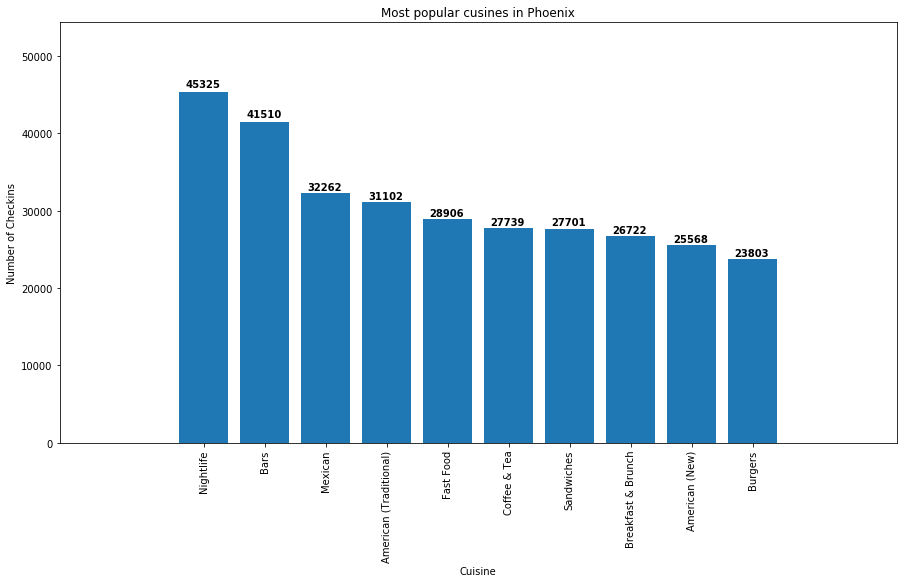

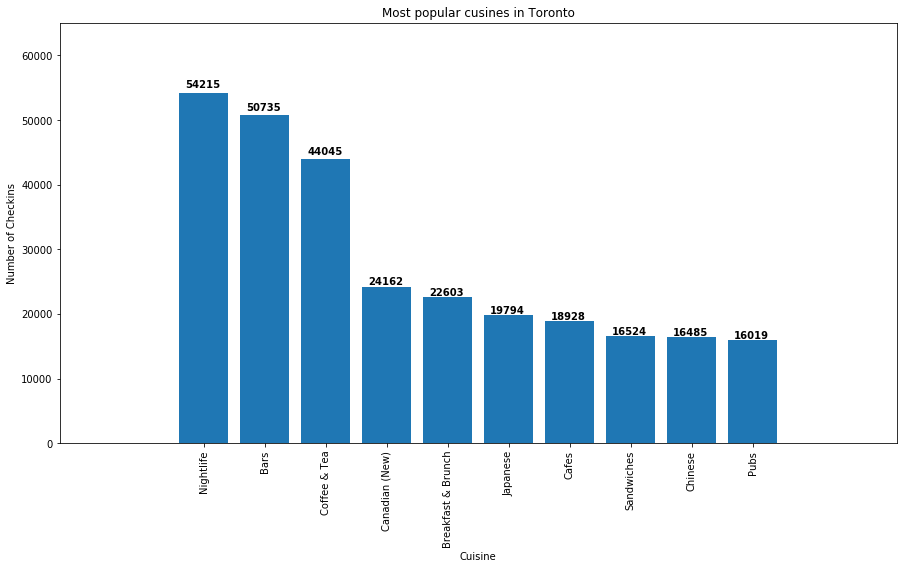

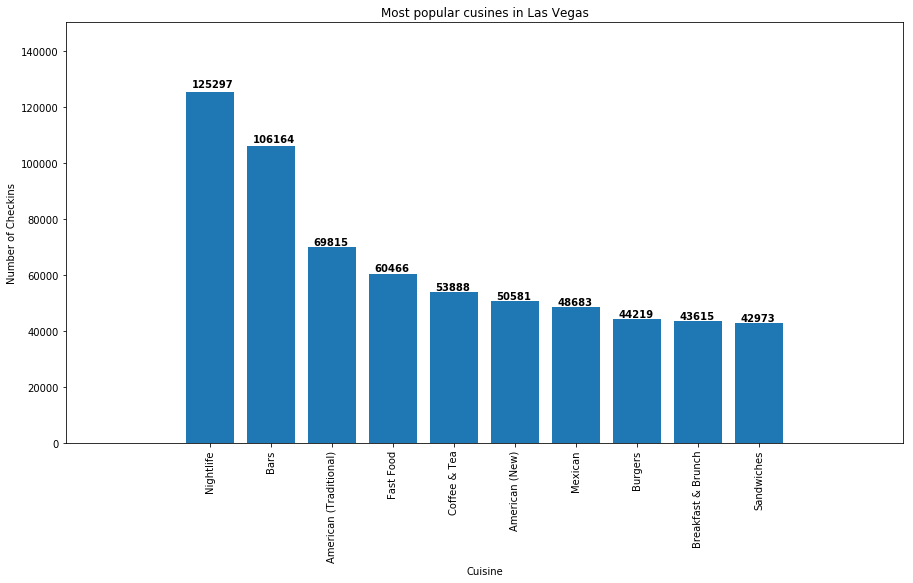

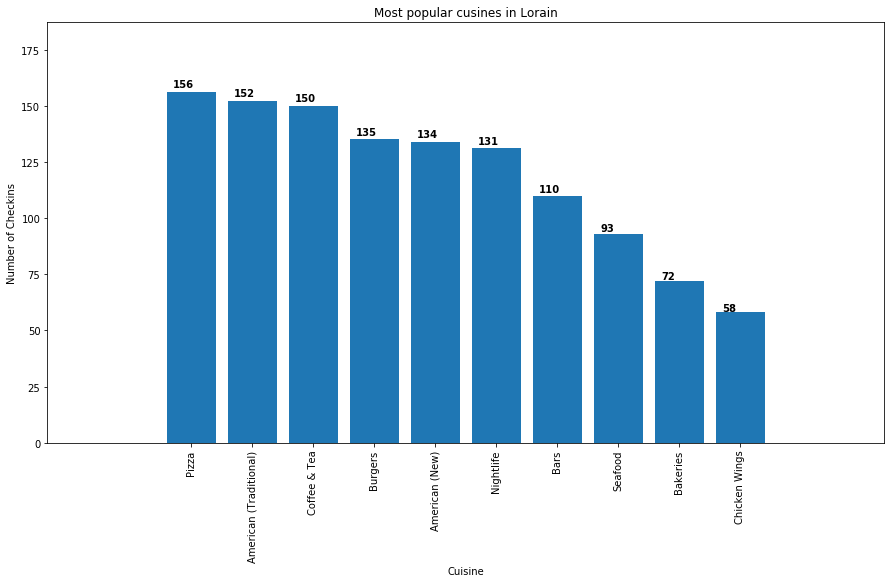

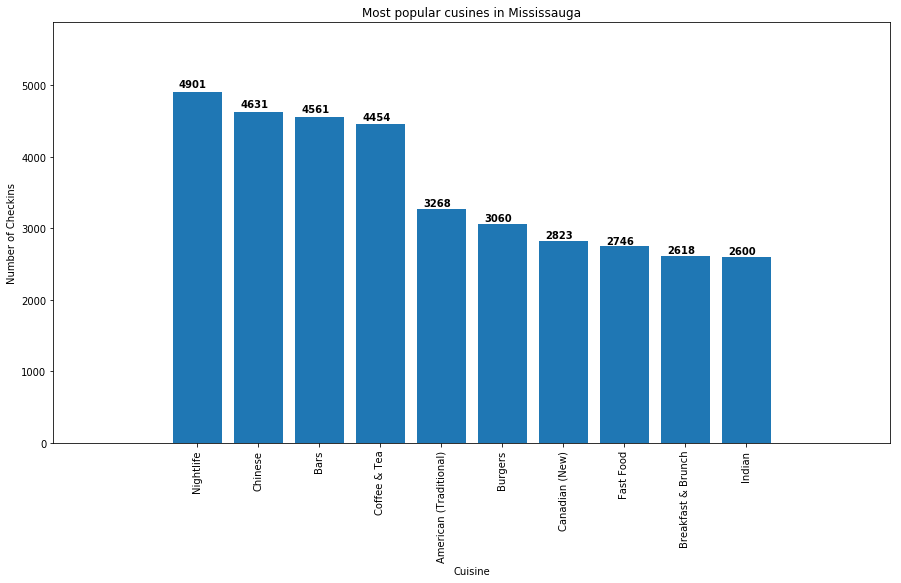

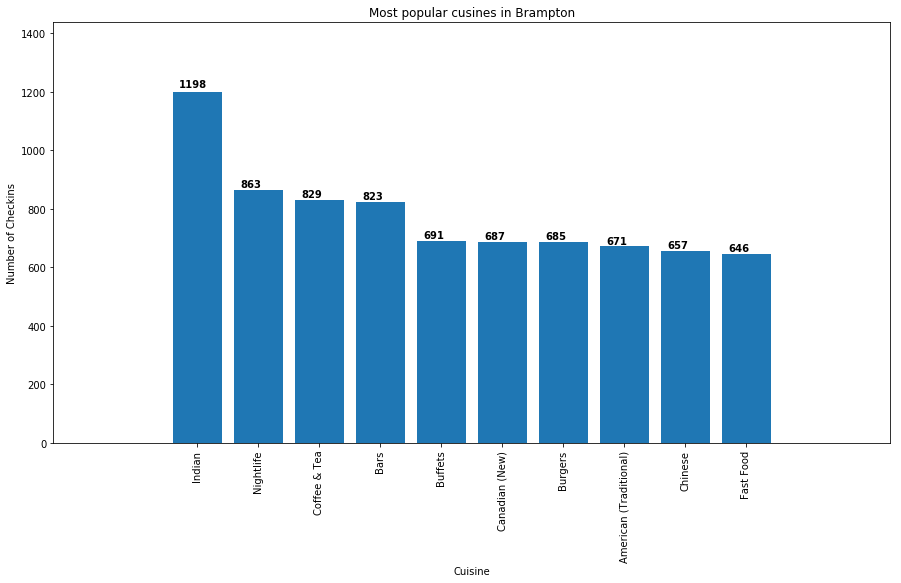

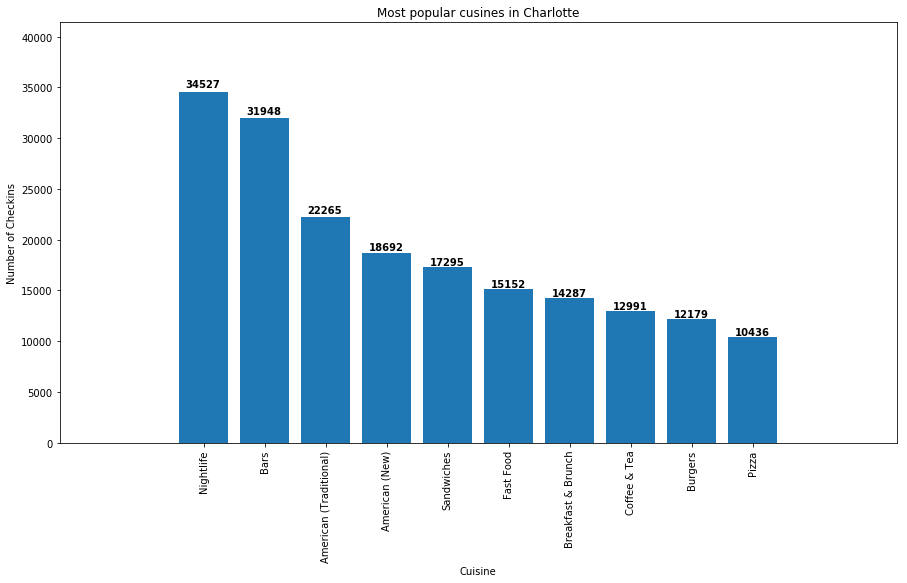

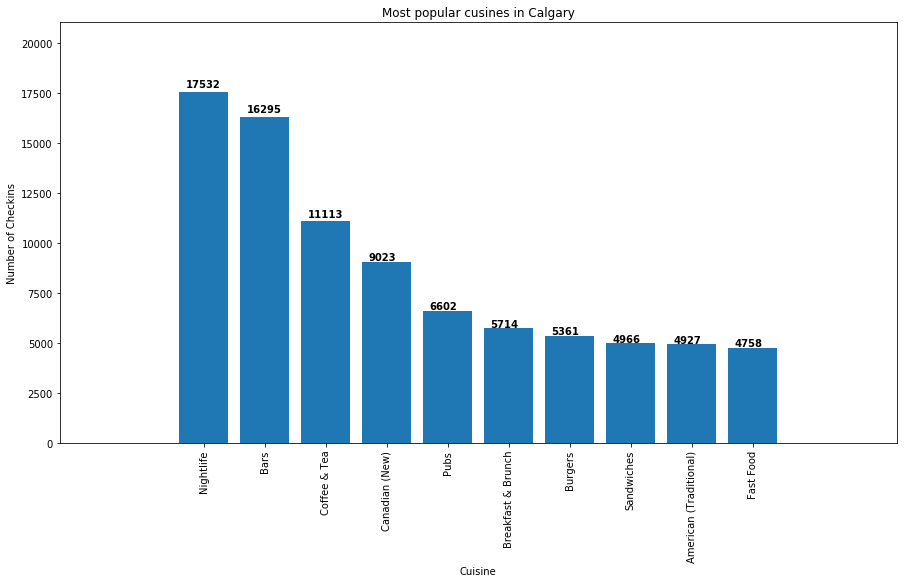

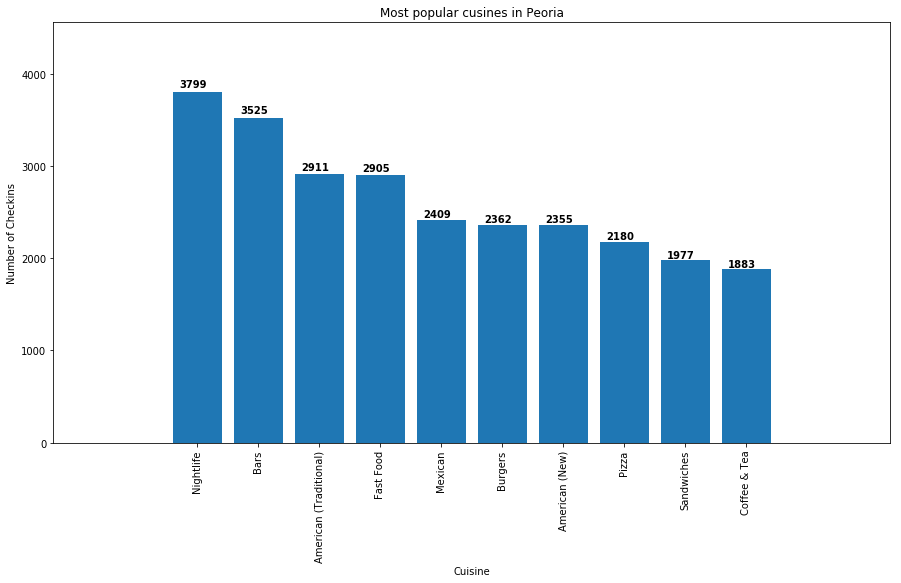

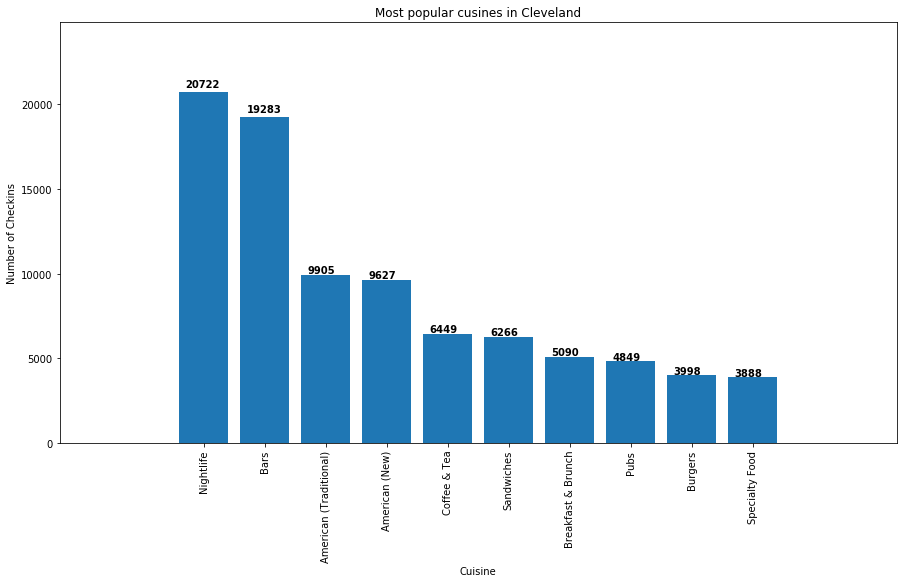

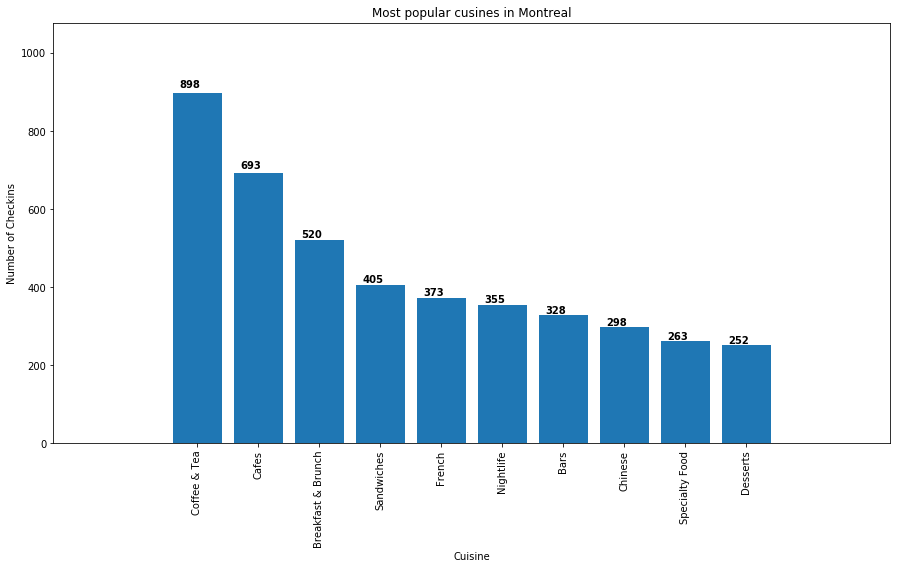

In [329]:
plotCityCuisinesCount('Phoenix')
plotCityCuisinesCount('Toronto')
plotCityCuisinesCount('Las Vegas')
plotCityCuisinesCount('Lorain')
plotCityCuisinesCount('Mississauga')
plotCityCuisinesCount('Brampton')
plotCityCuisinesCount('Charlotte')
plotCityCuisinesCount('Calgary')
plotCityCuisinesCount('Peoria')
plotCityCuisinesCount('Cleveland')
plotCityCuisinesCount('Montreal')

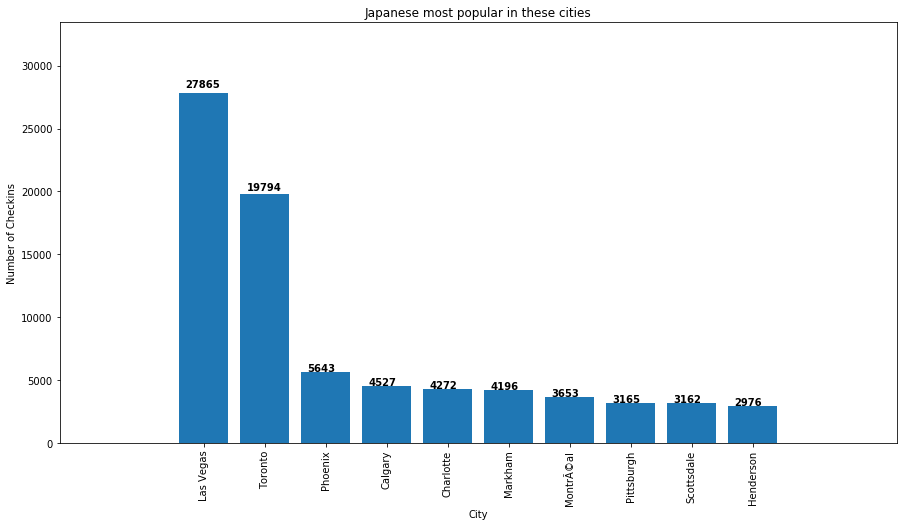

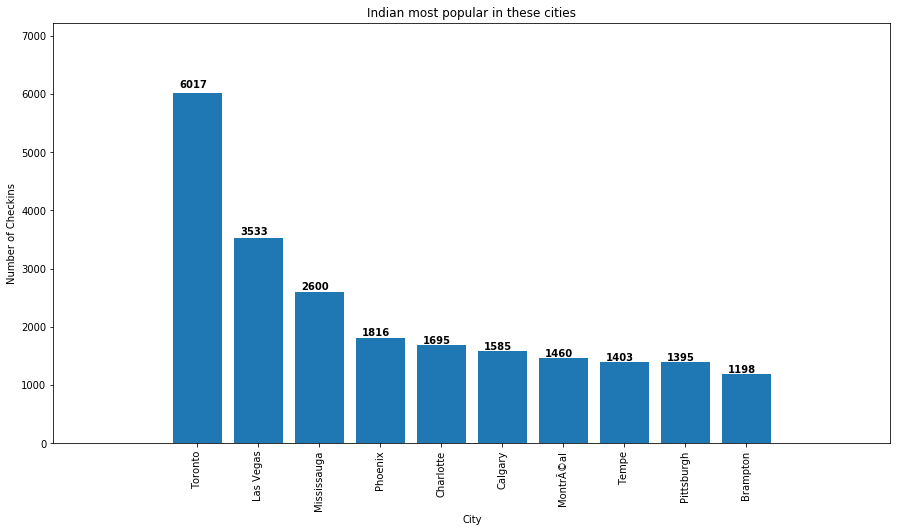

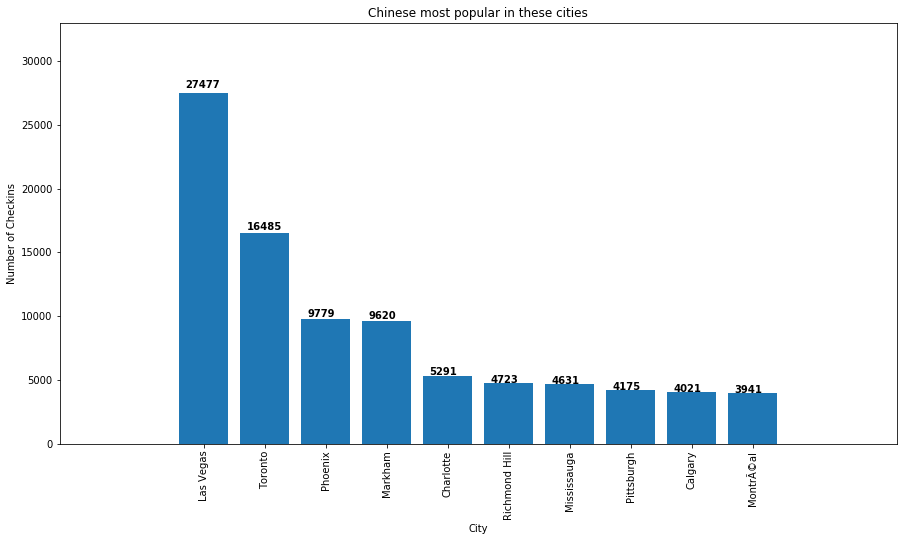

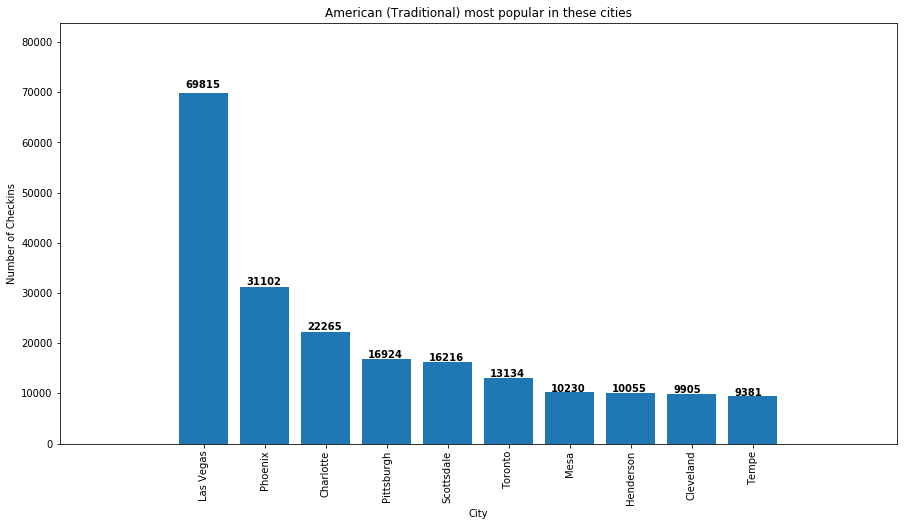

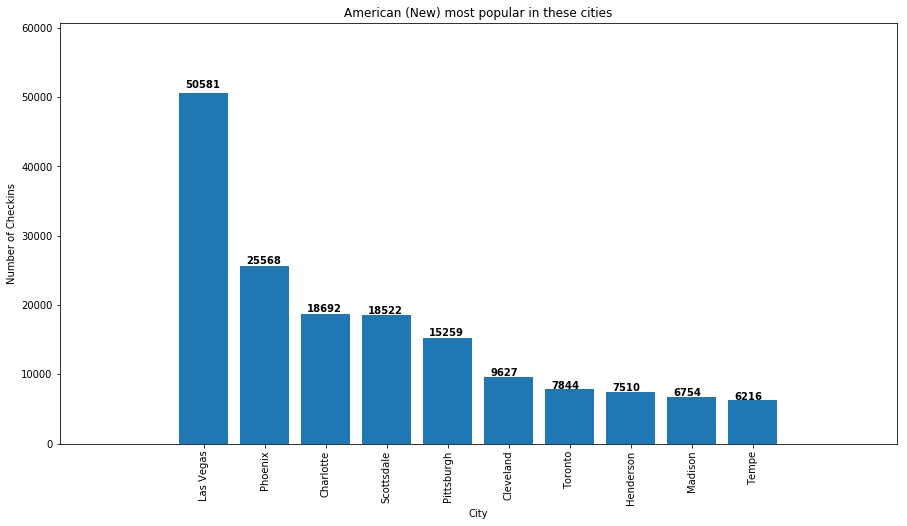

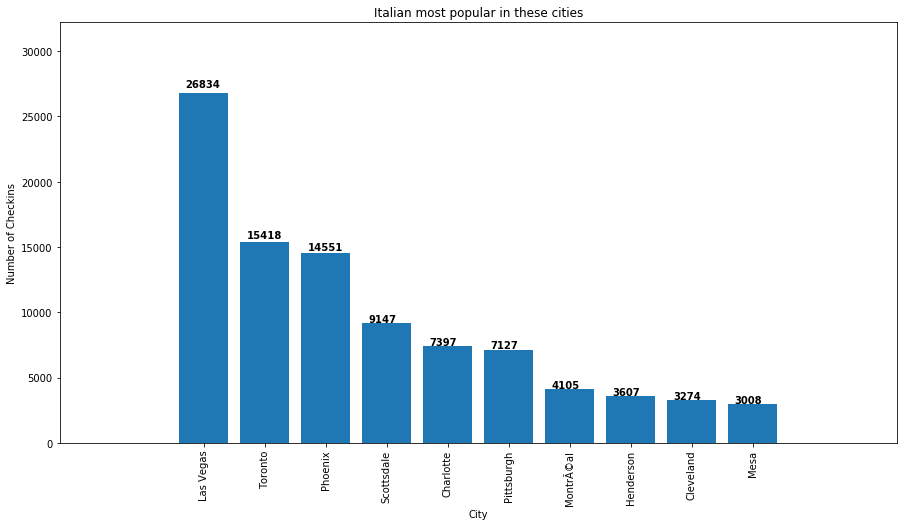

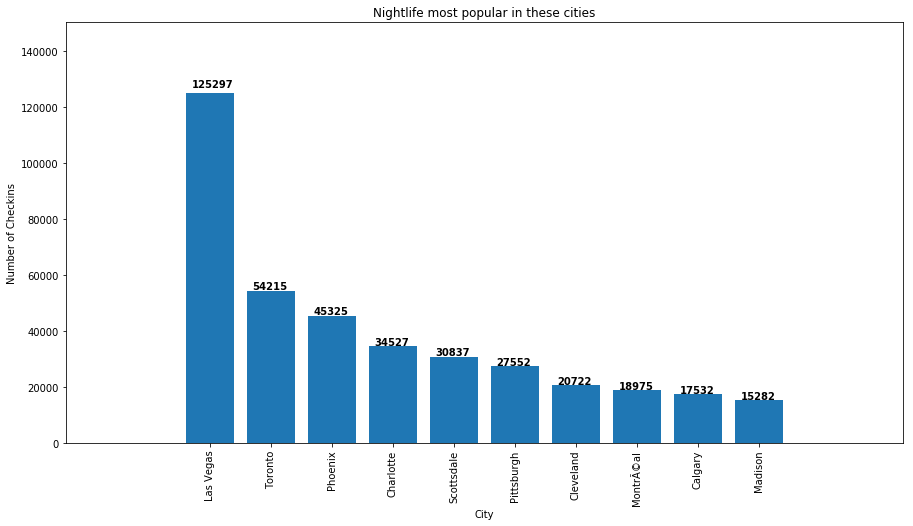

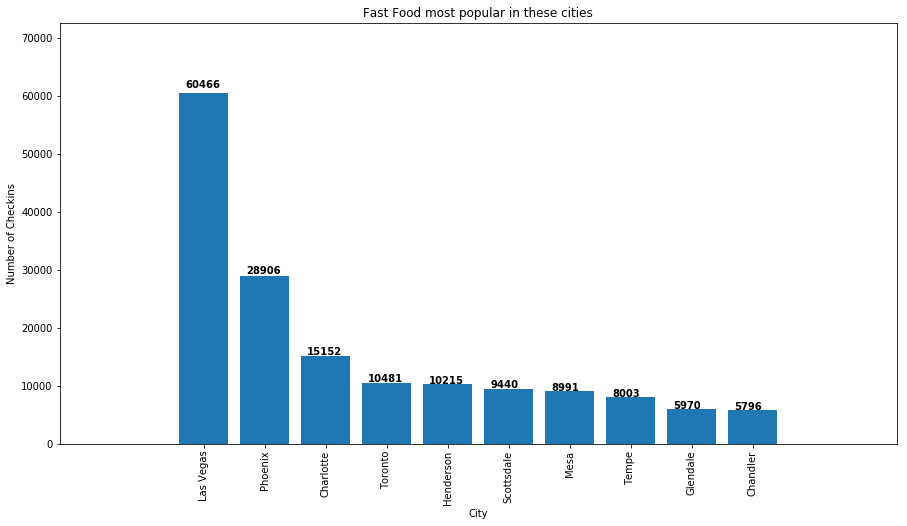

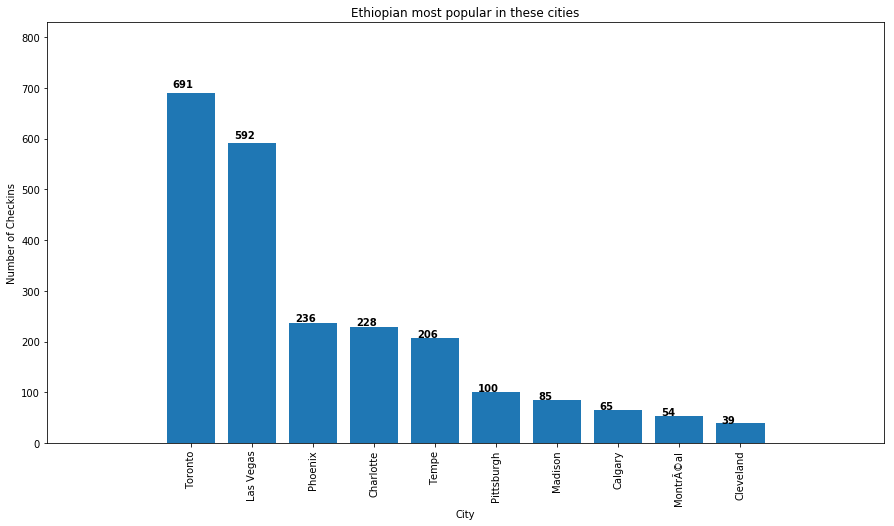

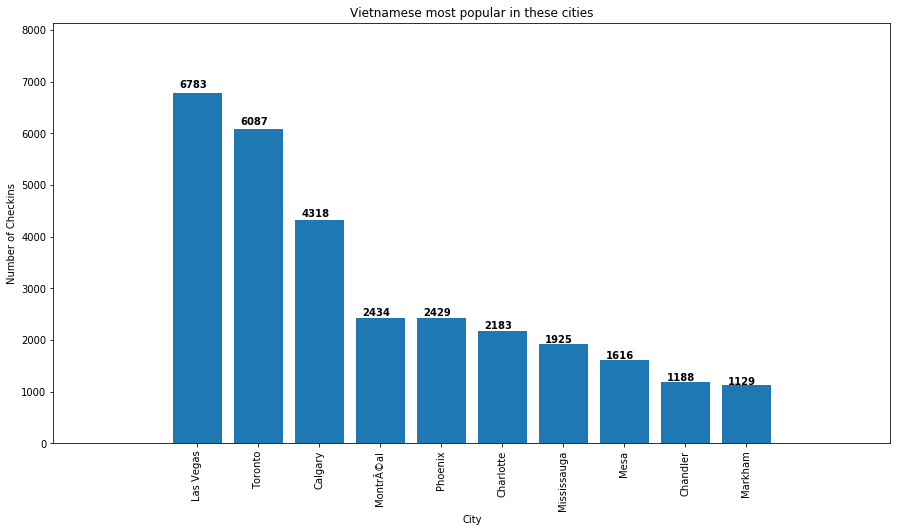

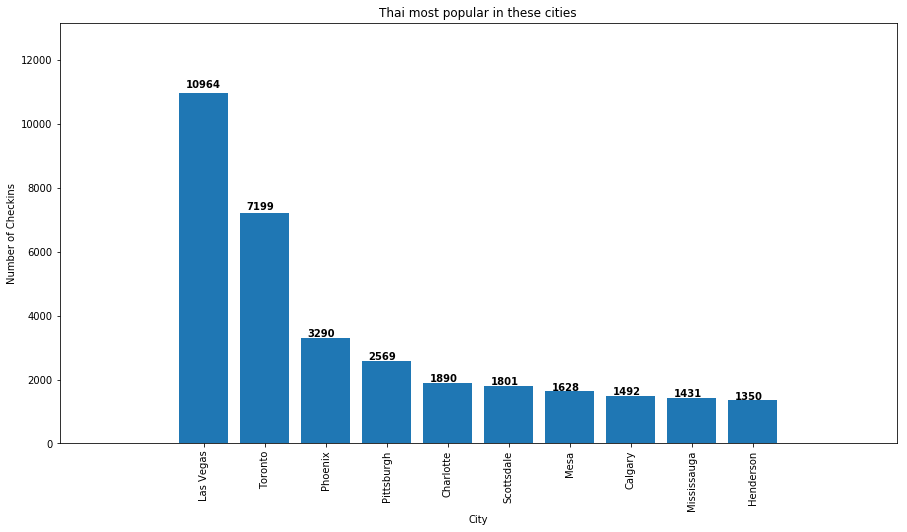

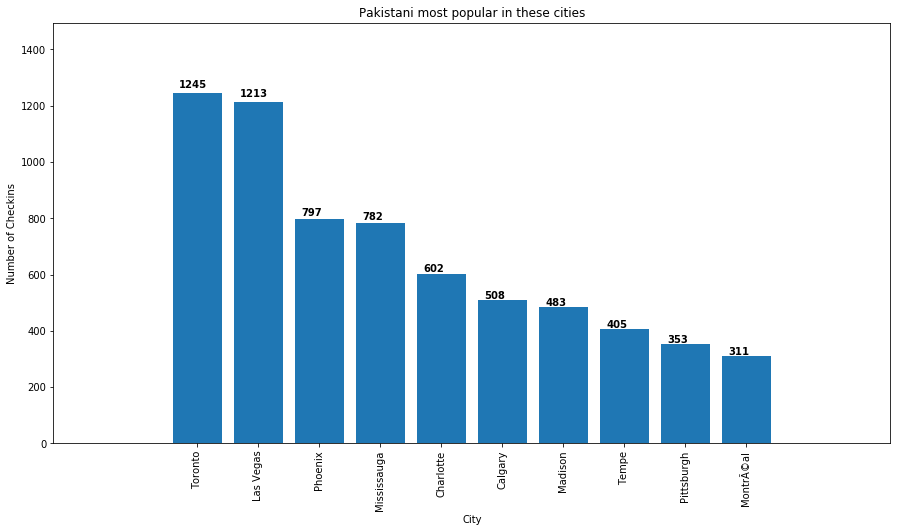

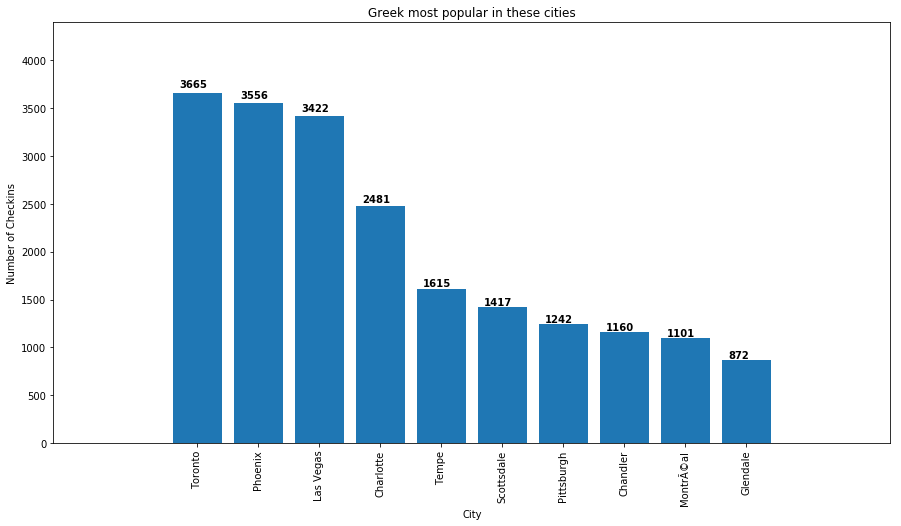

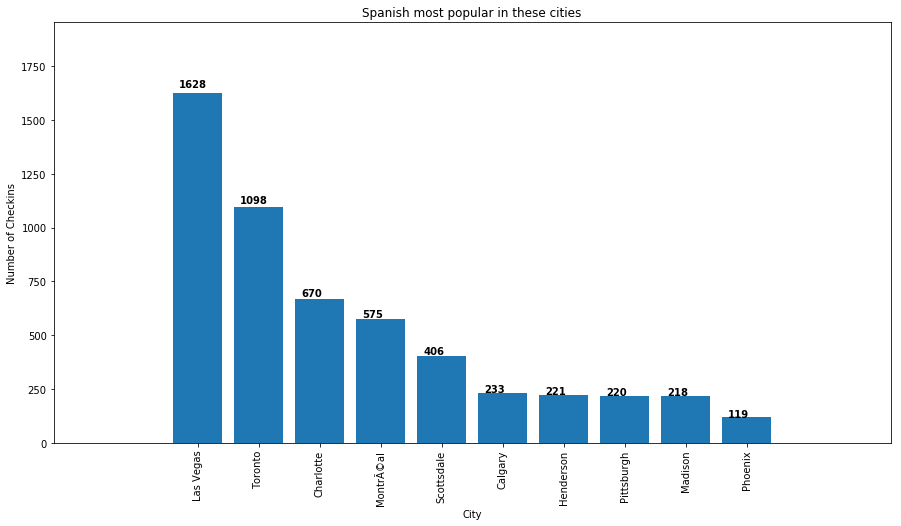

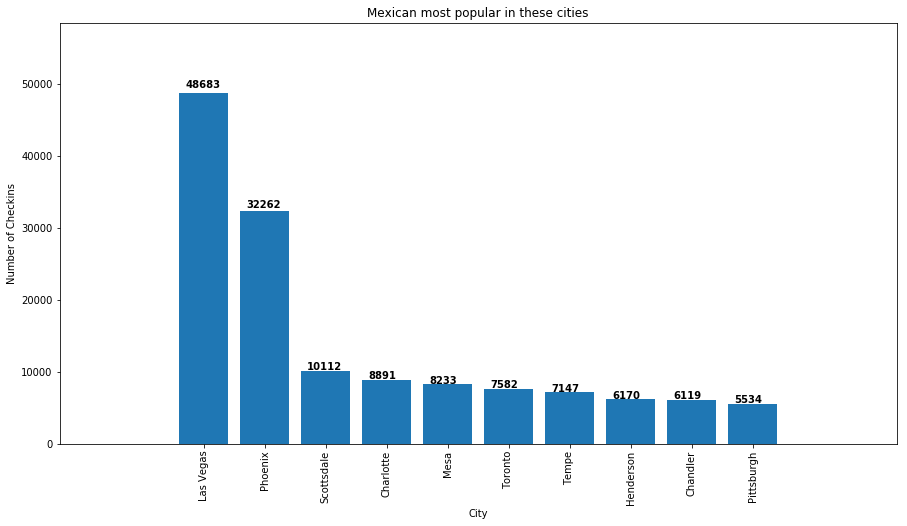

In [330]:
plotCuisineCitiesCount('Japanese')
plotCuisineCitiesCount('Indian')
plotCuisineCitiesCount('Chinese')
plotCuisineCitiesCount('American (Traditional)')
plotCuisineCitiesCount('American (New)')
plotCuisineCitiesCount('Italian')
plotCuisineCitiesCount('Nightlife')
plotCuisineCitiesCount('Fast Food')
plotCuisineCitiesCount('Ethiopian')
plotCuisineCitiesCount('Vietnamese')
plotCuisineCitiesCount('Thai')
plotCuisineCitiesCount('Pakistani')
plotCuisineCitiesCount('Greek')
plotCuisineCitiesCount('Spanish')
plotCuisineCitiesCount('Mexican')